In [ ]:
img_list = []
Gen_losses = []
Disc_losses = []

real_label = 1.
fake_label = 0.

iters = 0
num_epochs = 50

print("Starting...")
for epoch in range(num_epochs):
    for i, data in enumerate(bydataloader, 0):
        Disc.zero_grad()
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)#creating labels for real images
         #Forward pass(real images-discriminator)
        output = Disc(real_cpu).view(-1)
        Disc_real_loss = criterion(output, label)
        Disc_real_loss.backward()
        #Generating the fake images by generator
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = Gen(noise)
        label.fill_(fake_label)
        #Forward pass(Fake images-discriminator)
        output = Disc(fake.detach()).view(-1)
        Disc_fake_loss = criterion(output, label)
        Disc_fake_loss.backward()

        Disc_loss = Disc_real_loss + Disc_fake_loss
        #Disc_loss = (Disc_real_loss + Disc_fake_loss)/ 2
        Disc_optimizer.step()

        Gen.zero_grad()
        label.fill_(real_label)

        output = Disc(fake).view(-1)
        Gen_loss = criterion(output, label)
        Gen_loss.backward()
        Gen_optimizer.step()

        if i % 50 == 0: #print at every 50 iters
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f'
                  % (epoch, num_epochs, i//50 + 1, len(bydataloader)//50 + 1,
                     Disc_loss.item(), Gen_loss.item()))

        Gen_losses.append(Gen_loss.item())
        Disc_losses.append(Disc_loss.item())

        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(bydataloader)-1)):
            with torch.no_grad():
                fake = Gen(fixed_noise).detach().cpu() #image generation at fixed noise
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/50][1/3]	Loss_D: 1.8486	Loss_G: 8.4258
[0/50][2/3]	Loss_D: 1.3144	Loss_G: 12.1429
[0/50][3/3]	Loss_D: 1.0268	Loss_G: 4.0564
[1/50][1/3]	Loss_D: 0.6939	Loss_G: 2.4067
[1/50][2/3]	Loss_D: 0.3865	Loss_G: 2.7567
[1/50][3/3]	Loss_D: 0.5397	Loss_G: 4.4348
[2/50][1/3]	Loss_D: 0.5000	Loss_G: 5.3362
[2/50][2/3]	Loss_D: 0.1372	Loss_G: 4.0370
[2/50][3/3]	Loss_D: 0.3857	Loss_G: 4.1219
[3/50][1/3]	Loss_D: 0.2616	Loss_G: 3.8087
[3/50][2/3]	Loss_D: 1.6913	Loss_G: 9.8361
[3/50][3/3]	Loss_D: 0.1810	Loss_G: 5.2419
[4/50][1/3]	Loss_D: 0.2311	Loss_G: 5.2591
[4/50][2/3]	Loss_D: 0.8090	Loss_G: 2.1001
[4/50][3/3]	Loss_D: 0.6340	Loss_G: 3.5790
[5/50][1/3]	Loss_D: 0.9509	Loss_G: 7.8004
[5/50][2/3]	Loss_D: 2.3005	Loss_G: 6.2492
[5/50][3/3]	Loss_D: 0.3278	Loss_G: 3.8080
[6/50][1/3]	Loss_D: 0.2462	Loss_G: 3.4033
[6/50][2/3]	Loss_D: 1.2658	Loss_G: 0.7988
[6/50][3/3]	Loss_D: 0.9935	Loss_G: 5.7058
[7/50][1/3]	Loss_D: 0.8795	Loss_G: 3.7277
[7/50][2/3]	Loss_D: 2.2778	Loss_G: 8.1365
[7/50][

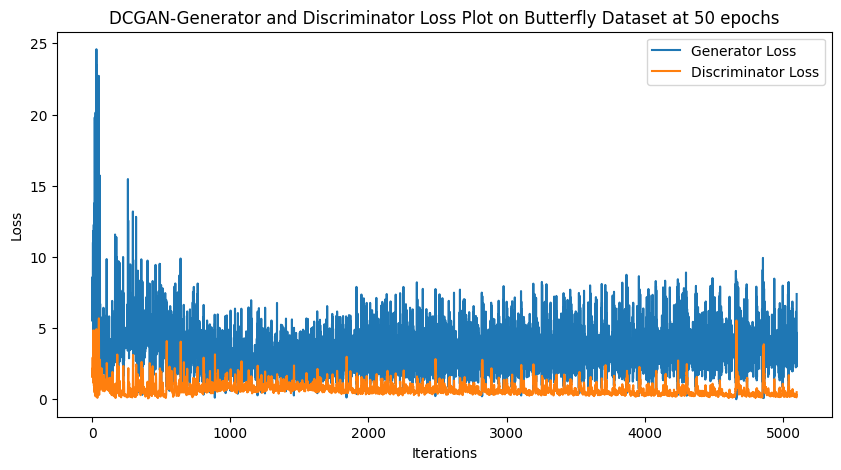

In [ ]:
plt.figure(figsize=(10,5))
plt.title("DCGAN-Generator and Discriminator Loss Plot on Butterfly Dataset at 50 epochs")
plt.plot(G_losses,label="Generator Loss")
plt.plot(D_losses,label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


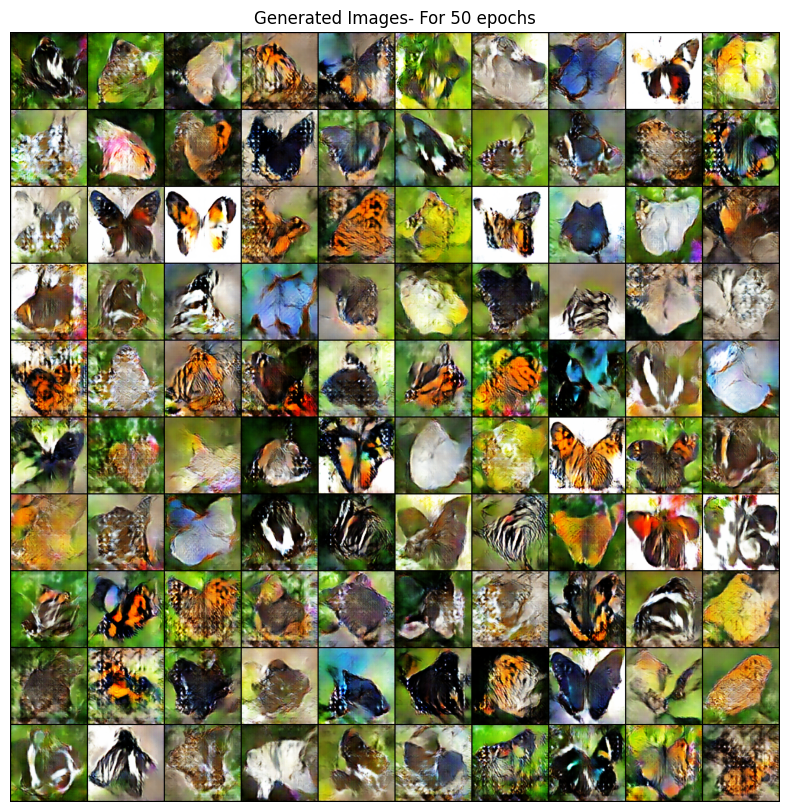

In [ ]:
# 10x10 grid
with torch.no_grad():
    fixed_noise = torch.randn(100, nz, 1, 1, device=device)
    fake_images = netG(fixed_noise).detach().cpu()

# Plot a 10x10 grid of generated images
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Generated Images- For 50 epochs")
plt.imshow(np.transpose(vutils.make_grid(fake_images, nrow=10, padding=2, normalize=True), (1,2,0)))
plt.show()


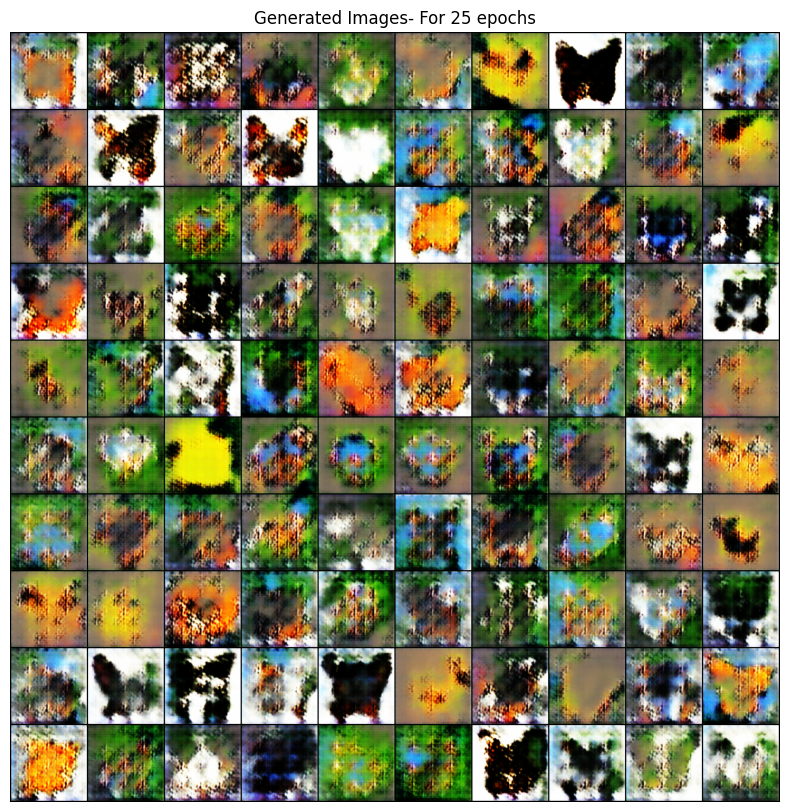

In [ ]:
# 10x10 grid
with torch.no_grad():
    fixed_noise = torch.randn(100, nz, 1, 1, device=device)
    fake_images = netG(fixed_noise).detach().cpu()

# Plot a 10x10 grid of generated images
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Generated Images- For 25 epochs")
plt.imshow(np.transpose(vutils.make_grid(fake_images, nrow=10, padding=2, normalize=True), (1,2,0)))
plt.show()


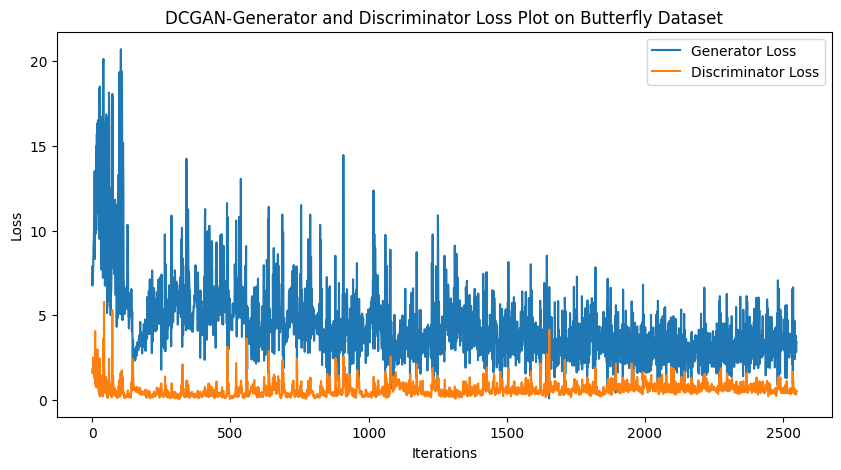

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,5))
plt.title("DCGAN-Generator and Discriminator Loss Plot on Butterfly Dataset at 25 epochs")
plt.plot(G_losses,label="Generator Loss")
plt.plot(D_losses,label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()
